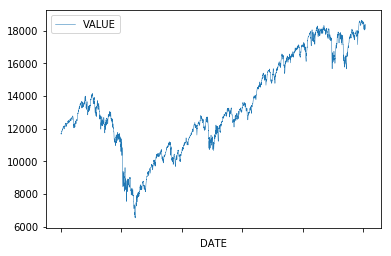

In [4]:
# Problem 1
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
d=pd.read_csv("DJIA.csv",header=0,index_col=0)
d.replace(".",np.nan,inplace=True)
d=d.dropna()
d['VALUE'] = pd.to_numeric(d['VALUE'])
d.plot(y="VALUE",lw=0.5)
plt.show()

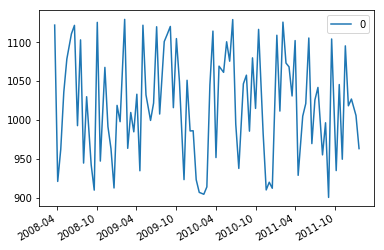

In [69]:
# Problem 2
pay=pd.read_csv("paychecks.csv",header=None)
d1=pd.date_range(start='3/13/2008',freq="WOM-1FRI",periods=46)
d2=pd.date_range(start='3/13/2008',freq="WOM-3FRI",periods=47)
date=d1.union(d2)
pay.index=date
pay.plot()

In [6]:
# Problem 3
f=pd.read_csv("finances.csv")

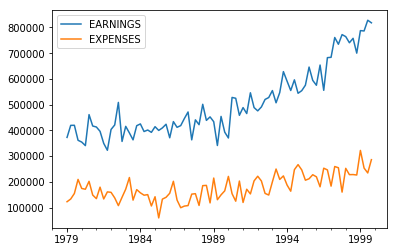

In [7]:
p=pd.period_range("1978-09","1999-08",freq="Q-AUG")
f.index=p
f.plot()

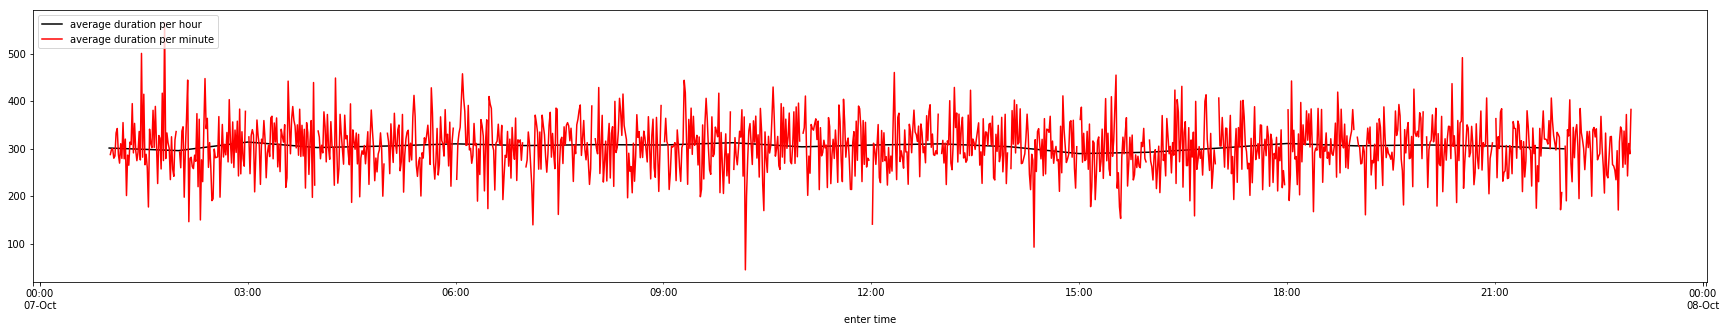

In [147]:
#Problem 4
from matplotlib import pyplot as plt
web=pd.read_csv("website_traffic.csv")
enter=pd.to_datetime(web["ENTER"])
leave=pd.to_datetime(web["LEAVE"])
web["duration"]=leave-enter
web["duration"]=web["duration"].dt.total_seconds().astype(int)
e=pd.to_datetime(web["ENTER"])
web.index=e
web.drop("ENTER",axis=1)
web.index.names=['enter time']
minutes=web.resample("T")
m=minutes["duration"].mean()
hours=web.resample("H")
h=hours["duration"].mean()
plt.figure(figsize=(30,5))
ax1=h.plot(color='black',label='average duration per hour')
ax2=m.plot(color='red',label='average duration per minute')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [140]:
#Problem 5
date=pd.to_datetime(d.index)
d.index=date
#difference_day=#
diff_day=d-d.shift(1)
print("the single day with the largest gain: ",diff_day.idxmax())
print("the single day with the largest loss: ",diff_day.idxmin())
months=d.resample('M')
diff_m=months.last()-months.first()
print("the month with the largest gain: ",diff_m.idxmax())
print("the month with the largest loss: ",diff_m.idxmin())

the single day with the largest gain:  VALUE   2008-10-13
dtype: datetime64[ns]
the single day with the largest loss:  VALUE   2008-09-29
dtype: datetime64[ns]
the month with the largest gain:  VALUE   2015-10-31
dtype: datetime64[ns]
the month with the largest loss:  VALUE   2008-10-31
dtype: datetime64[ns]


Text(0.5,1,'Rolling Average')

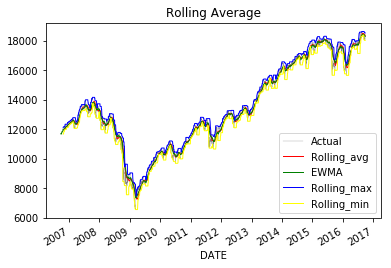

In [170]:
#Problem 6
i=pd.to_datetime(d.index)
d.index=i
ax1=plt.subplot(111)
d.plot(color="gray", lw=.3,ax=ax1)
d.rolling(window=30).mean().plot(color='r', lw=1,ax=ax1)
d.ewm(span=30).mean().plot(color='g', lw=1,ax=ax1)
d.rolling(window=20).max().plot(color="blue",lw=1,ax=ax1)
d.rolling(window=20).min().plot(color="yellow",lw=1,ax=ax1)
ax1.legend(["Actual", "Rolling_avg","EWMA","Rolling_max","Rolling_min"], loc="lower right")
ax1.set_title("Rolling Average")